In [1]:
from aocd import get_data, submit
import numpy as np 
import matplotlib.pyplot as plt

data = get_data(year=2022, day=14)
data = data.splitlines()

start_offset = np.array([0, 0])

def parse_points(line):
    points = line.split("->")
    return [np.array(list(map(int,p.split(",")))) for p in points]
data = [parse_points(line) for line in data]

# determine bounds for field
end_x_orig, end_y = np.max(np.array(sum(data, [])), axis=0)
start_x_orig, _ = np.min(np.array(sum(data, [])), axis=0)
start_x = start_x_orig - 200
end_x = end_x_orig + 200
start_y = 0
start_offset = np.array([start_x, start_y])
data = [[p - start_offset for p in line] for line in data]

In [21]:
from matplotlib import animation
def generate_field(end_x, start_x, end_y, start_offset, data):
    field = np.zeros((end_x-start_x, end_y-start_y+5)).astype("int")
    for points in data:

        a = points[0] 
        for b in points [1:]:
            diff = a - b
            markers = np.linspace(a, b, np.max(np.abs(a-b))+1).astype("int")
            field[tuple(markers.T)] = 1
            a = b
    return field

def simulate_sand(field, start_offset, animate=False):
    ims = []
    test_locs = np.array([[0, 1], [-1, 1], [1, 1]])
    sand_count = 0
    space_left = True
    while space_left:
        s_pos = np.array([500,0]) - start_offset
        if field[tuple(s_pos)] == 2:
            break
        while True:
            if s_pos[1] > end_y + 3: 
                space_left = False
                break
            for t in test_locs:
                if field[tuple(s_pos+t)] == 0:
                    s_pos += t
                    break
            else: 
                field[tuple(s_pos)] = 2
                sand_count += 1
                break
            if animate:
                frame = field.copy()
                frame[tuple(s_pos)] = 3
                frame = frame[170:270].T
                ims.append(frame)

    return sand_count, field, ims


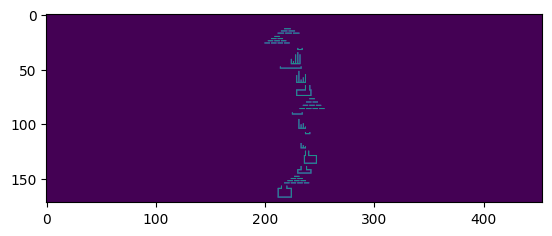

In [18]:
field = generate_field(end_x, start_x, end_y, start_offset, data)
plt.imshow(field.T, vmax=2)

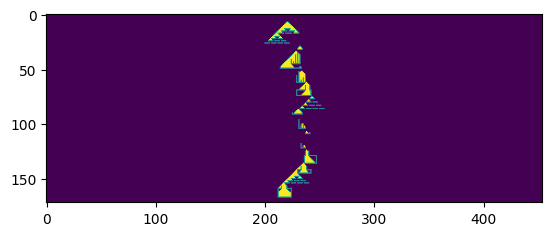

In [19]:
field = generate_field(end_x, start_x, end_y, start_offset, data)
sand_count, field, _ = simulate_sand(field, start_offset)
plt.imshow(field.T, vmax=2)


In [5]:
submit(sand_count, year=2022, day=14, part="a")

Part a already solved with same answer: 610


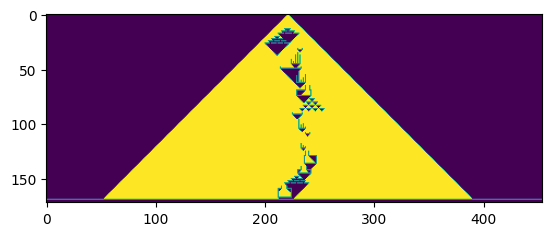

In [6]:
field = generate_field(end_x, start_x, end_y, start_offset, data)
field[:, end_y+2] = 1
sand_count, field, _ = simulate_sand(field, start_offset)
plt.imshow(field.T, vmax=2)


In [7]:
submit(sand_count, year=2022, day=14, part="b")

Part b already solved with same answer: 27194


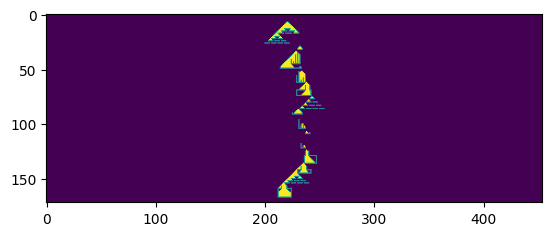

In [22]:
field = generate_field(end_x, start_x, end_y, start_offset, data)
sand_count, field, plot_data = simulate_sand(field, start_offset, True)
plt.imshow(field.T, vmax=2)

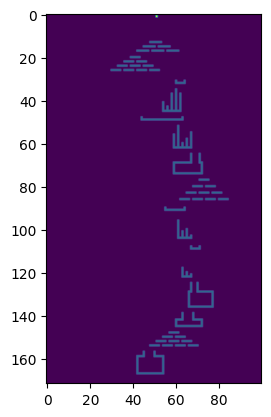

In [26]:
fig, ax = plt.subplots()
line = ax.imshow(plot_data[0])

def animate(frame_num):
    line.set_data(plot_data[frame_num])
    return line

anim = animation.FuncAnimation(fig, animate, frames=5000, interval=20)

In [27]:
from IPython import display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()    

In [25]:
len(plot_data)

52854